In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
base_dir = '../data/bilingual_curves/'

In [3]:
def smooth(scalars, weight):  # Weight between 0 and 1
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value

    return smoothed

In [4]:
def plot_curves(df_dict, title, palette=None, fig_size=(18,16), save_dir=None):
    for df in df_dict.values():
        df.columns = ['wall_time', 'step', 'accuracy']
        df['smoothed_acc'] = smooth(df['accuracy'], .6)
        df['step_ps'] = df['step']/1000
    fig = plt.figure(figsize=fig_size)
    if palette:
        colors_ = sn.color_palette(palette)[:5]
    else:
        colors_ = sn.color_palette('YlOrRd')[:5] + sn.color_palette('Blues')[:5]
        #colors_ = sn.color_palette('Blues')[:5]
    for idx, item in enumerate(df_dict.items()):
        label, df = item
        if idx == 0:
            sn.lineplot(data=df, x='step_ps', y='accuracy', label=label, color='black')
        else:
            sn.lineplot(data=df, x='step_ps', y='accuracy', label=label, color=colors_[idx-1])

    plt.legend(fontsize=14, loc='lower right', prop={'size': 25})
    plt.title(title, fontsize=30)
    plt.xlabel('Batches (in thousands)', fontsize=25)
    plt.xticks(fontsize=23)
    plt.ylabel('Accuracy', fontsize=25)
    plt.yticks(fontsize=23)
    if save_dir:
        save_file = save_dir + title + '.png'
        fig.savefig(save_file, dpi = fig.dpi, facecolor=(1,1,1,1))

In [7]:
spanish_italian_base = pd.read_csv(base_dir + 'spanish_italian_bil_train.csv')
spanish_finnish_base = pd.read_csv(base_dir + 'spanish_finnish_bil_train.csv')
spanish_italian_base_eng = pd.read_csv(base_dir + 'spanish_italian_bil_eng_train.csv')
spanish_finnish_base_eng = pd.read_csv(base_dir + 'spanish_finnish_bil_eng_train.csv')


bil_dfs = [spanish_italian_base, spanish_finnish_base, spanish_italian_base_eng,
          spanish_finnish_base_eng]

In [8]:
labels = ['Spanish-Italian', 'Spanish-Finnish', 
          'Spanish-Italian-English', 'Spanish-Finnish-English']

In [11]:
bil_dict = dict(zip(labels, bil_dfs))

### Bilingual Training

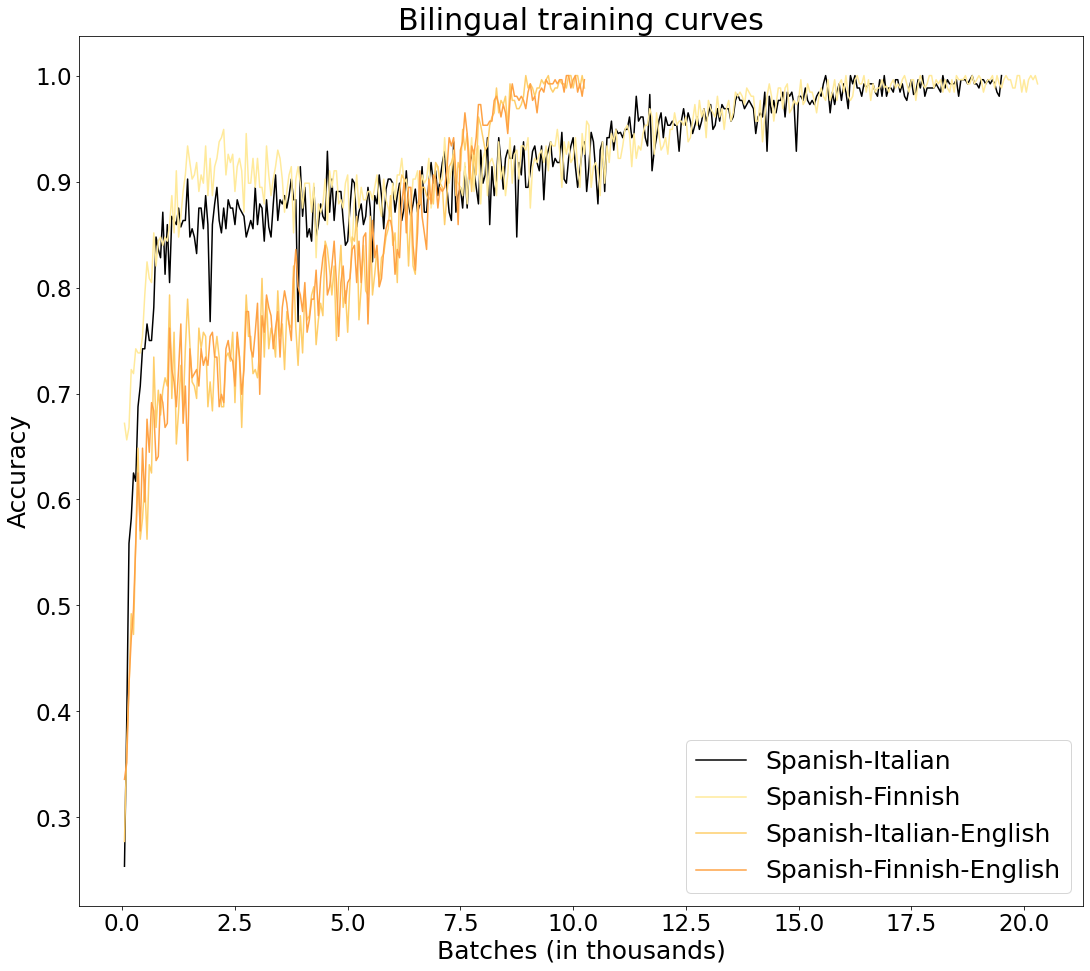

In [12]:
plot_curves(bil_dict, 'Bilingual training curves', save_dir='../graphs/smoothed/')

### Bilingual Validation Curves

In [13]:
spanish_italian_base = pd.read_csv(base_dir + 'spanish_italian_bil_val.csv')
spanish_finnish_base = pd.read_csv(base_dir + 'spanish_finnish_bil_val.csv')
spanish_italian_base_eng = pd.read_csv(base_dir + 'spanish_italian_bil_eng_val.csv')
spanish_finnish_base_eng = pd.read_csv(base_dir + 'spanish_finnish_bil_eng_val.csv')


bil_dfs = [spanish_italian_base, spanish_finnish_base, spanish_italian_base_eng,
          spanish_finnish_base_eng]

In [14]:
labels = ['Spanish-Italian', 'Spanish-Finnish', 
          'Spanish-Italian-English', 'Spanish-Finnish-English']

In [15]:
bil_dict = dict(zip(labels, bil_dfs))

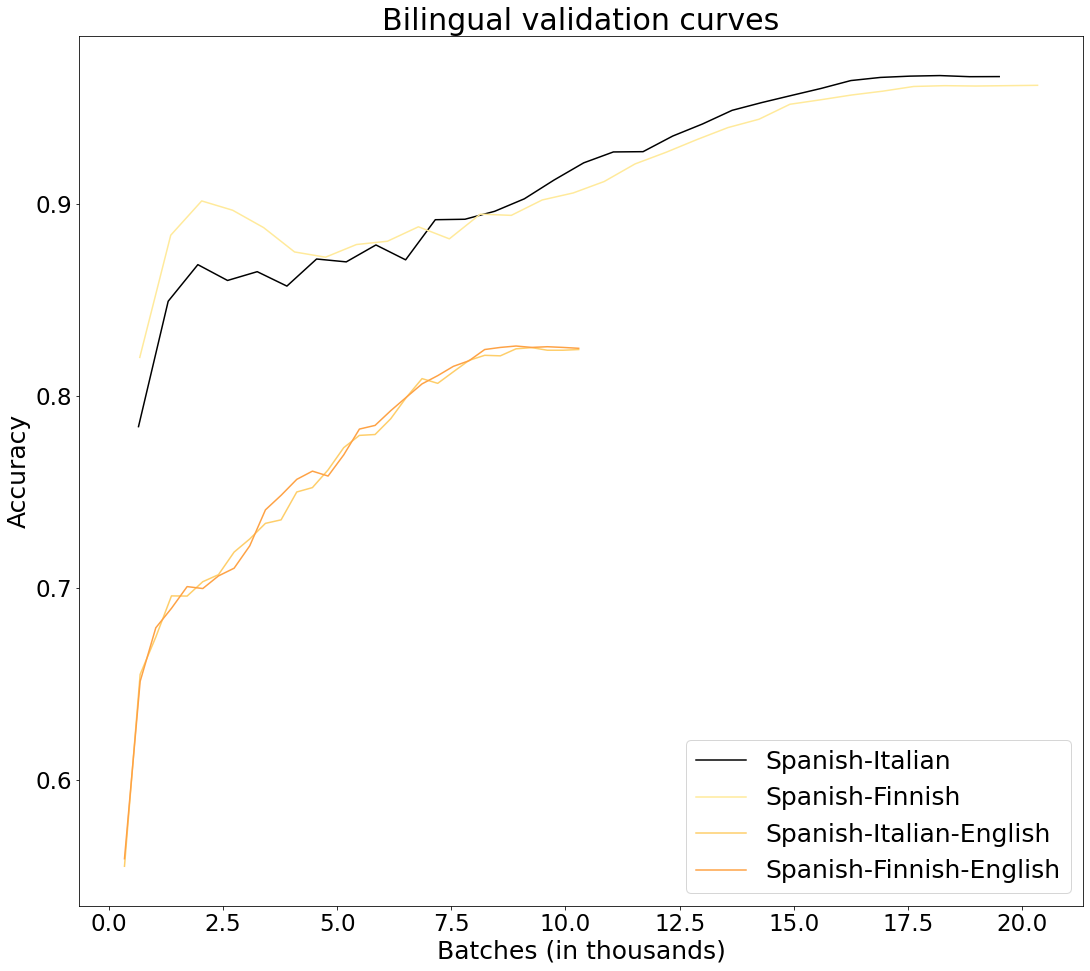

In [16]:
plot_curves(bil_dict, 'Bilingual validation curves', save_dir='../graphs/smoothed/')